In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.utils import np_utils


In [ ]:
import pickle

pickle_in = open('/content/drive/MyDrive/Covid19Prediction/X.pickle','rb')
X= pickle.load(pickle_in)

pickle_in = open('/content/drive/MyDrive/Covid19Prediction/Y.pickle','rb')
y = pickle.load(pickle_in)

In [ ]:
X.shape

(224, 224, 224, 3)

In [ ]:
y.shape

(224,)

0


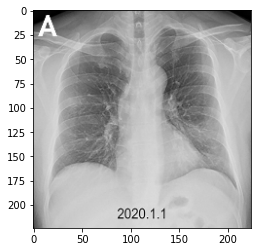

0


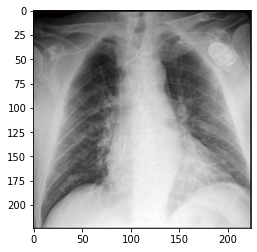

0


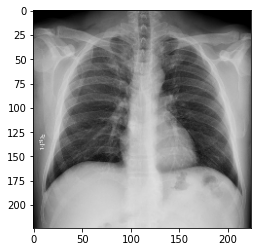

In [ ]:
for i in range(3):
  plt.imshow(X[i])
  print(y[i])
  plt.show()

In [ ]:
np.unique(y)

array([0, 1], dtype=int32)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(200,(3,3),activation='relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(2,2)) 
model.add(Conv2D(100,(2,2),activation='relu')) 
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(100,(2,2),activation='relu')) 
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.2))
model.add(Flatten())  
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu')) 
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 200)     5600      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 200)     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 110, 110, 100)     80100     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 100)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 55, 55, 100)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 54, 54, 100)       40100     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 27, 27, 100)      

In [ ]:
model.compile(loss ='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(X,y,test_size=0.1)

In [ ]:
history = model.fit(X,y, epochs = 20,validation_split=0.1)

Epoch 1/20
7/7 [==============================] - 6s 526ms/step - loss: 1.0195 - accuracy: 0.5349 - val_loss: 0.6319 - val_accuracy: 0.4783
Epoch 2/20
7/7 [==============================] - 1s 157ms/step - loss: 0.5503 - accuracy: 0.6231 - val_loss: 0.3176 - val_accuracy: 0.9565
Epoch 3/20
7/7 [==============================] - 1s 159ms/step - loss: 0.2300 - accuracy: 0.9046 - val_loss: 0.2836 - val_accuracy: 0.9130
Epoch 4/20
7/7 [==============================] - 1s 158ms/step - loss: 0.2103 - accuracy: 0.8891 - val_loss: 0.2023 - val_accuracy: 0.9565
Epoch 5/20
7/7 [==============================] - 1s 159ms/step - loss: 0.1419 - accuracy: 0.9508 - val_loss: 0.0912 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 1s 158ms/step - loss: 0.0828 - accuracy: 0.9668 - val_loss: 0.0717 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 1s 160ms/step - loss: 0.0460 - accuracy: 0.9773 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 8/20
7/7 [====

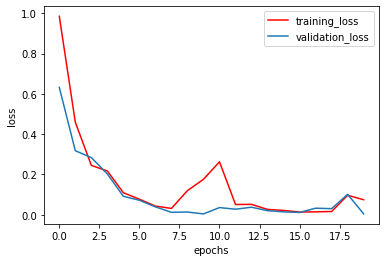

In [ ]:
from matplotlib import  pyplot as plt

plt.plot(history.history['loss'],'r',label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

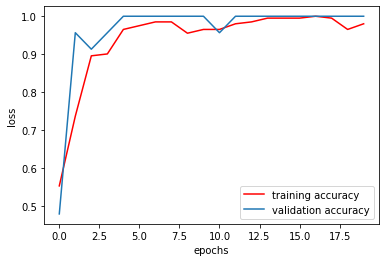

In [ ]:

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import pickle

pickle_in = open('/content/drive/MyDrive/Covid19Prediction/X_test.pickle','rb')
X_test= pickle.load(pickle_in)

pickle_in = open('/content/drive/MyDrive/Covid19Prediction/Y_test.pickle','rb')
y_test = pickle.load(pickle_in)

In [ ]:
print(model.evaluate(X_test,y_test))

2/2 [==============================] - 1s 1s/step - loss: 0.1506 - accuracy: 0.9667
[0.15063528716564178, 0.9666666388511658]


In [ ]:
import numpy as np
import cv2


In [ ]:
#img ='/content/drive/MyDrive/Covid19Prediction/covid-19-pneumonia-12.jpg'
img = '/content/drive/MyDrive/Covid19Prediction/NORMAL2-IM-0408-0001.jpeg'
img1 = cv2.imread(img)

In [ ]:
resized=cv2.resize(img1,(224,224))
normalized=resized/255.0
img2=np.expand_dims(normalized,axis=0)
img2.shape

(1, 224, 224, 3)

In [ ]:
result = model.predict(img2)
print(result)

[[0.9989256]]
